<a href="https://colab.research.google.com/github/rohimatun/2025-Pengolahan-Citra-TI2B/blob/main/Jobsheet_3_Rohimatun_Nurin_Nadhifah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perbaikan Citra dalam Domain Spasial

### Nama : Rohimatun Nurin Nadhifah
### NIM : 4.33.23.1.22
### Kelas : TI-2B

## P1. Transformasi Kurva (Citra Negatif)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float

# ===================
# 1. TRANSFORMASI NEGATIF CITRA GRAYSCALE
# ===================
image_gray_uint8 = data.camera()                         # Citra grayscale (512x512, 0..255)
image_gray_float = img_as_float(image_gray_uint8)        # Konversi ke float [0..1]
negative_gray = 1.0 - image_gray_float                   # Inversi intensitas: output = 1 - input

# ===================
# 2. TRANSFORMASI NEGATIF CITRA BERWARNA
# ===================
image_color_uint8 = data.astronaut()                     # Citra berwarna (512x512x3, 0..255)
image_color_float = img_as_float(image_color_uint8)      # Konversi ke float [0..1]
negative_color = 1.0 - image_color_float                 # Inversi intensitas tiap kanal RGB

# ===================
# 3. PLOTTING HASIL
# ===================
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Baris 1: Grayscale (original, negative)
axes[0, 0].imshow(image_gray_float, cmap='gray')
axes[0, 0].set_title("Grayscale (Original)")
axes[0, 0].axis('off')

axes[0, 1].imshow(negative_gray, cmap='gray')
axes[0, 1].set_title("Grayscale (Negative)")
axes[0, 1].axis('off')

# Baris 2: RGB (original, negative)
axes[1, 0].imshow(image_color_float)
axes[1, 0].set_title("Color (Original)")
axes[1, 0].axis('off')

axes[1, 1].imshow(negative_color)
axes[1, 1].set_title("Color (Negative)")
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

## P2. Histogram & Ekualisasi Histogram

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, exposure, img_as_float

# -----------------------------------------------------
# BAGIAN 1: HISTOGRAM & EKUALISASI HISTOGRAM (GRAYSCALE)
# -----------------------------------------------------

# 1. Memuat citra grayscale
image_gray_uint8 = data.camera()                        # sudah grayscale (uint8, 0..255)
image_gray = img_as_float(image_gray_uint8)             # konversi ke float [0..1]

# 2. Menghitung histogram citra asli (dengan numpy.histogram)
# Kita perbesar bins=256 untuk melihat distribusi piksel
hist_gray, bins_gray = np.histogram(image_gray.ravel(), bins=256, range=(0, 1))

# 3. Ekualisasi histogram
# Dengan skimage.exposure.equalize_hist, hasil di rentang [0..1]
image_gray_eq = exposure.equalize_hist(image_gray)
hist_gray_eq, bins_gray_eq = np.histogram(image_gray_eq.ravel(), bins=256, range=(0, 1))

# 4. Plot grayscale: citra asli & histogram, citra ekualisasi & histogram
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# (a) Citra Asli Grayscale
axes[0, 0].imshow(image_gray, cmap='gray')
axes[0, 0].set_title("Grayscale Original")
axes[0, 0].axis('off')

# (b) Histogram Citra Asli
axes[0, 1].hist(image_gray.ravel(), bins=256, range=(0, 1), color='gray')
axes[0, 1].set_title("Histogram Original")
axes[0, 1].set_xlim(0, 1)

# (c) Citra Hasil Ekualisasi
axes[1, 0].imshow(image_gray_eq, cmap='gray')
axes[1, 0].set_title("Grayscale Equalized")
axes[1, 0].axis('off')

# (d) Histogram Citra Hasil Ekualisasi
axes[1, 1].hist(image_gray_eq.ravel(), bins=256, range=(0, 1), color='gray')
axes[1, 1].set_title("Histogram Equalized")
axes[1, 1].set_xlim(0, 1)

plt.tight_layout()
plt.show()

# -------------------------------------------------------
# BAGIAN 2: HISTOGRAM & EKUALISASI HISTOGRAM (CITRA WARNA)
# -------------------------------------------------------

# 1. Memuat citra berwarna
image_color_uint8 = data.astronaut()                    # citra berwarna RGB (uint8)
image_color = img_as_float(image_color_uint8)           # konversi ke float [0..1]

# 2. Histogram gabungan R, G, B untuk citra asli
r_channel = image_color[:, :, 0]
g_channel = image_color[:, :, 1]
b_channel = image_color[:, :, 2]

# Hitung histogram untuk tiap kanal, 256 bins
hist_r, bins_r = np.histogram(r_channel.ravel(), bins=256, range=(0, 1))
hist_g, bins_g = np.histogram(g_channel.ravel(), bins=256, range=(0, 1))
hist_b, bins_b = np.histogram(b_channel.ravel(), bins=256, range=(0, 1))

# 3. Ekualisasi histogram tiap kanal secara independen
# (Catatan: cara ini bisa mengubah keseimbangan warna.
# Terkadang lebih baik melakukan ekualisasi hanya pada kanal luminance (Y)
# atau Value (HSV). Tapi di sini kita tunjukkan contoh per kanal.)
r_eq = exposure.equalize_hist(r_channel)
g_eq = exposure.equalize_hist(g_channel)
b_eq = exposure.equalize_hist(b_channel)

# Gabungkan kembali menjadi citra RGB yang sudah di-ekualisasi
image_color_eq = np.dstack((r_eq, g_eq, b_eq))

# Hitung histogram citra berwarna ekualisasi (tiap kanal)
hist_r_eq, bins_r_eq = np.histogram(r_eq.ravel(), bins=256, range=(0, 1))
hist_g_eq, bins_g_eq = np.histogram(g_eq.ravel(), bins=256, range=(0, 1))
hist_b_eq, bins_b_eq = np.histogram(b_eq.ravel(), bins=256, range=(0, 1))

# 4. Plot citra berwarna & histogram
fig2, axes2 = plt.subplots(2, 2, figsize=(10, 8))

# (a) Citra Asli (Color)
axes2[0, 0].imshow(image_color)
axes2[0, 0].set_title("Color Original")
axes2[0, 0].axis('off')

# (b) Histogram Asli (tumpuk R, G, B)
axes2[0, 1].hist(r_channel.ravel(), bins=256, range=(0, 1), color='red', alpha=0.5, label='Red')
axes2[0, 1].hist(g_channel.ravel(), bins=256, range=(0, 1), color='green', alpha=0.5, label='Green')
axes2[0, 1].hist(b_channel.ravel(), bins=256, range=(0, 1), color='blue', alpha=0.5, label='Blue')
axes2[0, 1].set_title("Histogram Original (RGB)")
axes2[0, 1].set_xlim(0, 1)
axes2[0, 1].legend(loc='upper right')

# (c) Citra Hasil Ekualisasi (RGB)
axes2[1, 0].imshow(image_color_eq)
axes2[1, 0].set_title("Color Equalized (per channel)")
axes2[1, 0].axis('off')

# (d) Histogram Ekualisasi (tumpuk R, G, B)
axes2[1, 1].hist(r_eq.ravel(), bins=256, range=(0, 1), color='red', alpha=0.5, label='Red eq')
axes2[1, 1].hist(g_eq.ravel(), bins=256, range=(0, 1), color='green', alpha=0.5, label='Green eq')
axes2[1, 1].hist(b_eq.ravel(), bins=256, range=(0, 1), color='blue', alpha=0.5, label='Blue eq')
axes2[1, 1].set_title("Histogram Equalized (RGB)")
axes2[1, 1].set_xlim(0, 1)
axes2[1, 1].legend(loc='upper right')

plt.tight_layout()
plt.show()

## P3. Konvolusi (Filter Rata-Rata)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from scipy import ndimage as ndi

# --------------------------------------------------
# 1) FILTER RATA-RATA PADA CITRA GRAYSCALE
# --------------------------------------------------

# A. Memuat citra grayscale (camera)
gray_uint8 = data.camera()  # range 0..255
gray_img = img_as_float(gray_uint8)  # konversi menjadi float [0..1]

# B. Definisikan kernel filter rata-rata (contoh: 5x5)
kernel_size = 5
kernel = np.ones((kernel_size, kernel_size), dtype=float) / (kernel_size * kernel_size)

# C. Lakukan konvolusi pada citra grayscale
gray_filtered = ndi.convolve(gray_img, kernel, mode='reflect')

# D. Tampilkan hasil
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(gray_img, cmap='gray')
axes[0].set_title("Grayscale - Original")
axes[0].axis('off')

axes[1].imshow(gray_filtered, cmap='gray')
axes[1].set_title(f"Grayscale - Filtered ({kernel_size}x{kernel_size} Average)")
axes[1].axis('off')

plt.tight_layout()
plt.show()

# --------------------------------------------------
# 2) FILTER RATA-RATA PADA CITRA BERWARNA
# --------------------------------------------------

# A. Memuat citra berwarna (astronaut)
color_uint8 = data.astronaut()  # citra RGB (uint8, 0..255)
color_img = img_as_float(color_uint8)  # konversi ke float [0..1]

# B. Terapkan filter rata-rata pada tiap kanal (R, G, B)
color_filtered = np.zeros_like(color_img)

for c in range(3):  # c = 0 (Red), 1 (Green), 2 (Blue)
    channel_original = color_img[:, :, c]
    channel_filtered = ndi.convolve(channel_original, kernel, mode='reflect')
    color_filtered[:, :, c] = channel_filtered

# C. Tampilkan hasil
fig2, axes2 = plt.subplots(1, 2, figsize=(10, 5))

axes2[0].imshow(color_img)
axes2[0].set_title("Color - Original")
axes2[0].axis('off')

axes2[1].imshow(color_filtered)
axes2[1].set_title(f"Color - Filtered ({kernel_size}x{kernel_size} Average)")
axes2[1].axis('off')

plt.tight_layout()
plt.show()

## P4. Filter Median (Penghilangan Noise/Derau)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, util, filters, morphology, img_as_float

# -----------------------------------------
# 1) FILTER MEDIAN PADA CITRA GRAYSCALE
# -----------------------------------------

# A. Memuat citra grayscale (contoh: 'camera')
gray_uint8 = data.camera()  # grayscale, uint8
gray_float = img_as_float(gray_uint8)  # konversi ke float [0..1]

# B. Menambahkan noise jenis salt-and-pepper
gray_noisy = util.random_noise(gray_float, mode='s&p', amount=0.05)
# amount=0.05 berarti 5% piksel terpengaruh noise

# C. Menerapkan filter median
# Menggunakan structuring element berbentuk disk radius 3
disk3 = morphology.disk(3)
gray_denoised = filters.median(gray_noisy, disk3)

# D. Tampilkan hasil
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(gray_float, cmap='gray')
axes[0].set_title("Grayscale - Original")
axes[0].axis('off')

axes[1].imshow(gray_noisy, cmap='gray')
axes[1].set_title("Grayscale - Noisy (Salt & Pepper)")
axes[1].axis('off')

axes[2].imshow(gray_denoised, cmap='gray')
axes[2].set_title("Grayscale - Median Filtered")
axes[2].axis('off')

plt.tight_layout()
plt.show()

# -----------------------------------------
# 2) FILTER MEDIAN PADA CITRA BERWARNA
# -----------------------------------------

# A. Memuat citra berwarna (contoh: 'astronaut')
color_uint8 = data.astronaut()  # RGB, uint8
color_float = img_as_float(color_uint8)  # rentang [0..1]

# B. Menambahkan noise salt-and-pepper
color_noisy = util.random_noise(color_float, mode='s&p', amount=0.05)

# C. Menerapkan filter median per kanal
color_denoised = np.zeros_like(color_noisy)
for c in range(color_noisy.shape[2]):
    color_denoised[:, :, c] = filters.median(color_noisy[:, :, c], morphology.disk(3))

# D. Tampilkan hasil
fig2, axes2 = plt.subplots(1, 3, figsize=(12, 4))

axes2[0].imshow(color_float)
axes2[0].set_title("Color - Original")
axes2[0].axis('off')

axes2[1].imshow(color_noisy)
axes2[1].set_title("Color - Noisy (Salt & Pepper)")
axes2[1].axis('off')

axes2[2].imshow(color_denoised)
axes2[2].set_title("Color - Median Filtered")
axes2[2].axis('off')

plt.tight_layout()
plt.show()

## Tugas 1: Eksperimen Transformasi Intensitas Lain

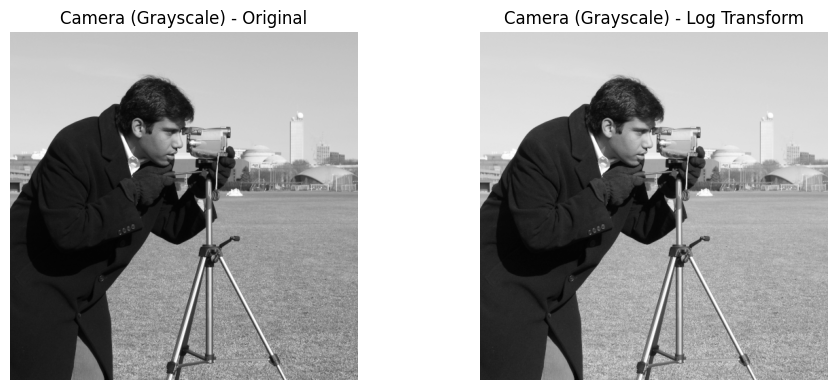

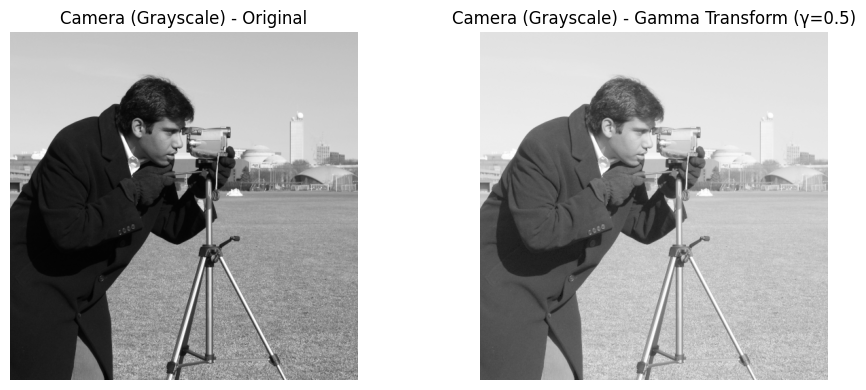

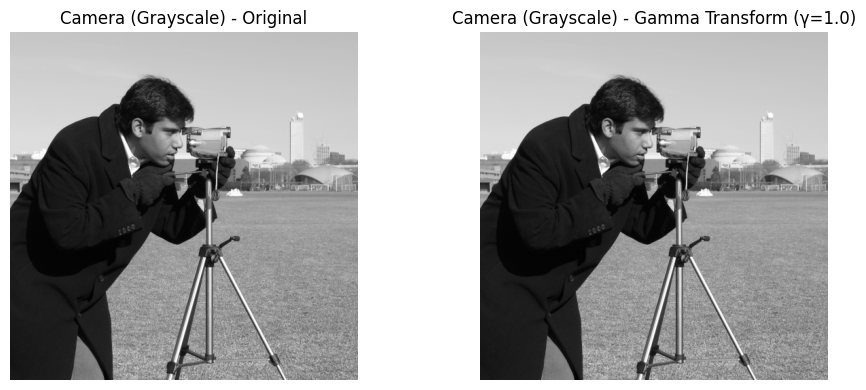

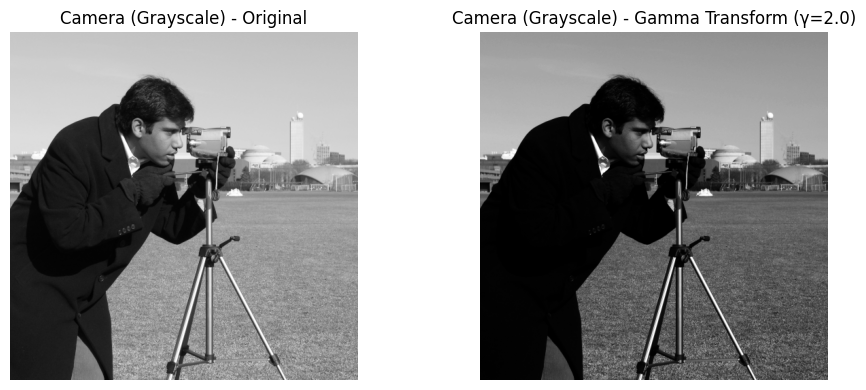

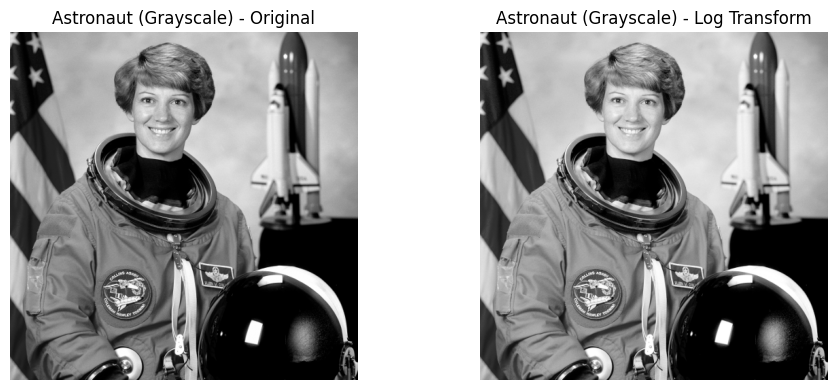

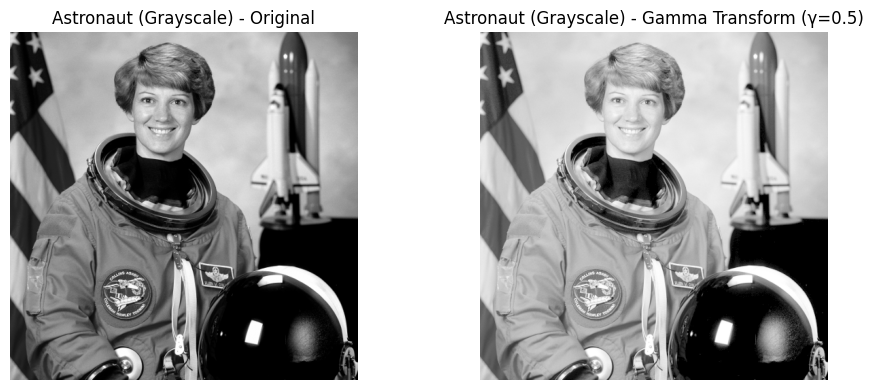

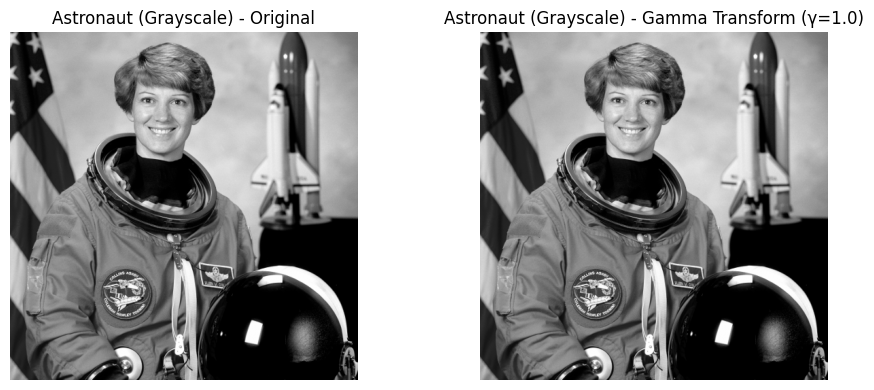

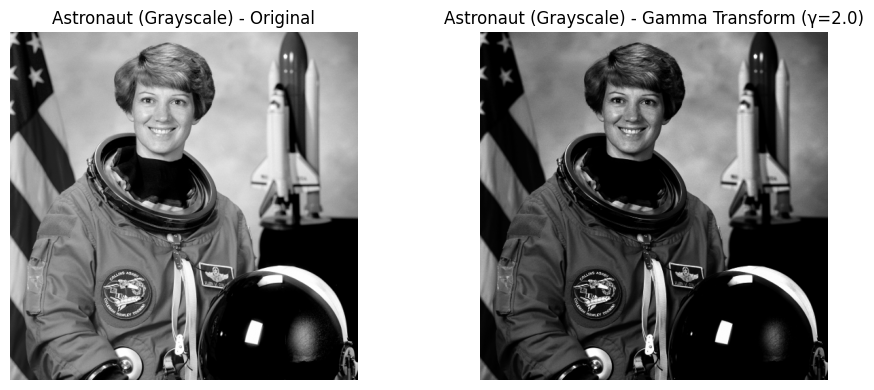

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, exposure, img_as_float

# -----------------------------------
# 1. LOAD CITRA GRAYSCALE
# -----------------------------------
camera = img_as_float(data.camera())
astronaut_rgb = data.astronaut()
astronaut_gray = img_as_float(color.rgb2gray(astronaut_rgb))

# Simpan dalam dict buat looping
images = {
    "Camera (Grayscale)": camera,
    "Astronaut (Grayscale)": astronaut_gray
}

# -----------------------------------
# 2. TRANSFORMASI LOGARITMIK & GAMMA
# -----------------------------------
c_log = 1.0  # konstanta log, bisa >1 untuk efek lebih kuat
gammas = [0.5, 1.0, 2.0]  # contoh variasi gamma

for name, img in images.items():
    # Transformasi Logaritmik
    img_log = c_log * np.log1p(img)  # log(1 + r), skimage gak punya fungsi langsung
    img_log = exposure.rescale_intensity(img_log, out_range=(0, 1))

    # Plot hasil log
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"{name} - Original")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img_log, cmap='gray')
    plt.title(f"{name} - Log Transform")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Transformasi Gamma dengan beberapa nilai
    for gamma in gammas:
        img_gamma = exposure.adjust_gamma(img, gamma=gamma, gain=1.0)

        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"{name} - Original")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(img_gamma, cmap='gray')
        plt.title(f"{name} - Gamma Transform (γ={gamma})")
        plt.axis('off')
        plt.tight_layout()
        plt.show()

## Tugas 2: Perbandingan Metode Peningkatan Kontras

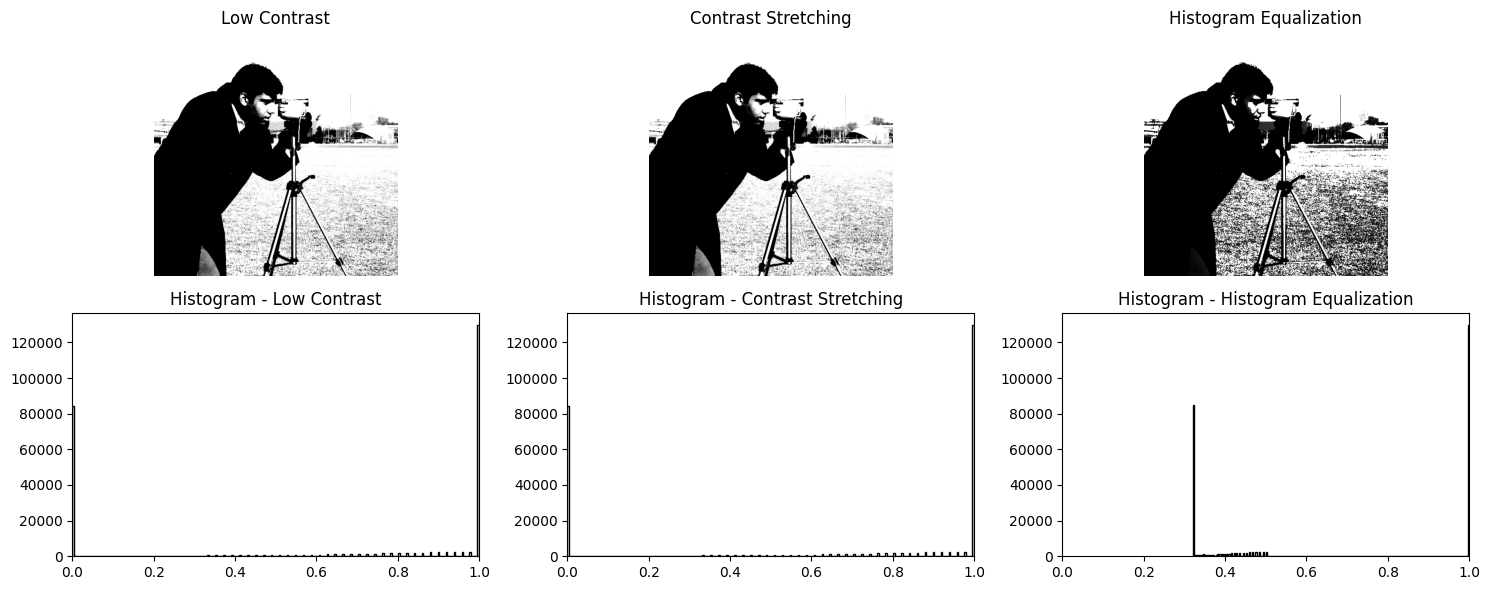

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, exposure, img_as_float, color

# 1. LOAD citra dan buat versi low contrast
original = img_as_float(data.camera())
low_contrast = exposure.rescale_intensity(original, in_range=(0.4, 0.6))  # bikin kontrasnya kecil

# 2. Apply Contrast Stretching
contrast_stretched = exposure.rescale_intensity(low_contrast, in_range='image', out_range=(0, 1))

# 3. Apply Histogram Equalization
hist_equalized = exposure.equalize_hist(low_contrast)

# 4. TAMPILKAN Citra & Histogram
titles = ['Low Contrast', 'Contrast Stretching', 'Histogram Equalization']
images = [low_contrast, contrast_stretched, hist_equalized]

fig, axes = plt.subplots(2, 3, figsize=(15, 6))

for i in range(3):
    # Citra
    axes[0, i].imshow(images[i], cmap='gray')
    axes[0, i].set_title(titles[i])
    axes[0, i].axis('off')

    # Histogram
    axes[1, i].hist(images[i].ravel(), bins=256, histtype='step', color='black')
    axes[1, i].set_xlim(0, 1)
    axes[1, i].set_title(f"Histogram - {titles[i]}")

plt.tight_layout()
plt.show()

## Tugas 3: Filter Median vs Filter Rata-Rata

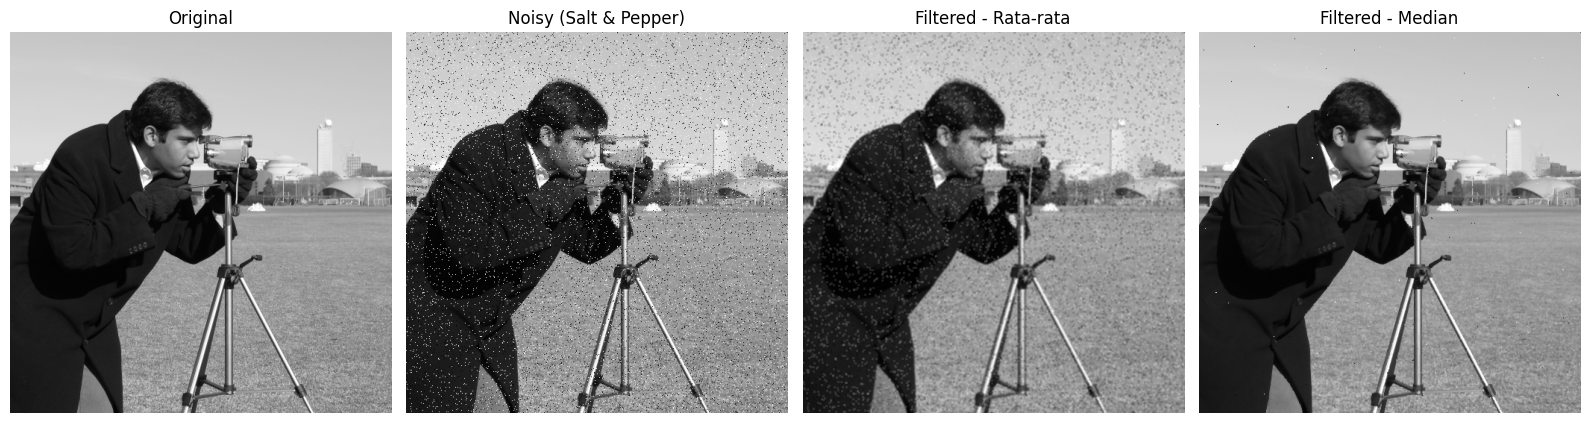

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, util, filters, img_as_float
from scipy.ndimage import convolve
from skimage.morphology import disk
from skimage.filters import median

# 1. Load citra grayscale
original = img_as_float(data.camera())

# 2. Tambahkan salt-and-pepper noise
noisy = util.random_noise(original, mode='s&p', amount=0.05)

# 3. Filter Rata-rata: gunakan kernel 3x3
kernel = np.ones((3, 3)) / 9
avg_filtered = convolve(noisy, kernel)

# Alternatif lain: filters.gaussian(noisy, sigma=1) → hasil lebih smooth tapi blur

# 4. Filter Median
median_filtered = median(noisy, disk(1))  # disk radius 1 = kernel 3x3

# 5. Tampilkan hasil
titles = ['Original', 'Noisy (Salt & Pepper)', 'Filtered - Rata-rata', 'Filtered - Median']
images = [original, noisy, avg_filtered, median_filtered]

fig, axes = plt.subplots(1, 4, figsize=(16, 5))
for i in range(4):
    axes[i].imshow(images[i], cmap='gray')
    axes[i].set_title(titles[i])
    axes[i].axis('off')

plt.tight_layout()
plt.show()